In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
from PIL import Image

from sklearn.model_selection import train_test_split

import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
image_dir = Path('data/fishdataset')

### get the file path and label seperately

In [3]:
filepaths=list(image_dir.glob(r'**/*.png'))

In [4]:
labels=list(map(lambda x:os.path.split(os.path.split(x)[0])[1], filepaths))


In [5]:
filepaths=pd.Series(filepaths, name='paths').astype(str)
labels=pd.Series(labels, name='labels')

In [6]:
df=pd.concat([filepaths,labels], axis=1)
df

,paths,labels
0,data/fishdataset/Sea Bass/00258.png,Sea Bass
1,data/fishdataset/Sea Bass/00207.png,Sea Bass
2,data/fishdataset/Sea Bass/00029.png,Sea Bass
3,data/fishdataset/Sea Bass/00275.png,Sea Bass
4,data/fishdataset/Sea Bass/00510.png,Sea Bass
...,...,...
8995,data/fishdataset/Shrimp/00382.png,Shrimp
8996,data/fishdataset/Shrimp/00568.png,Shrimp
8997,data/fishdataset/Shrimp/00139.png,Shrimp
8998,data/fishdataset/Shrimp/00092.png,Shrimp


In [7]:
sampl_list=[]
for lab in df['labels'].unique():
    sampl_list.append(df.query("labels==@lab").sample(200,random_state=1))

In [8]:
test_list=[]
for i in range(len(sampl_list)):
    test_list.append(sampl_list[i][:40])


In [9]:
train_list=[]
for i in range(len(sampl_list)):
    train_list.append(sampl_list[i][40:])

In [10]:
test_df=pd.concat(test_list).sample(frac=1,random_state=1).reset_index(drop=True)
test_df

,paths,labels
0,data/fishdataset/Hourse Mackerel/00567.png,Hourse Mackerel
1,data/fishdataset/Trout/00350.png,Trout
2,data/fishdataset/Red Sea Bream/00545.png,Red Sea Bream
3,data/fishdataset/Red Mullet/00072.png,Red Mullet
4,data/fishdataset/Gilt-Head Bream/00973.png,Gilt-Head Bream
...,...,...
355,data/fishdataset/Striped Red Mullet/00538.png,Striped Red Mullet
356,data/fishdataset/Hourse Mackerel/00973.png,Hourse Mackerel
357,data/fishdataset/Black Sea Sprat/00842.png,Black Sea Sprat
358,data/fishdataset/Striped Red Mullet/00104.png,Striped Red Mullet


In [11]:
train_df=pd.concat(train_list).sample(frac=1,random_state=1).reset_index(drop=True)
train_df


,paths,labels
0,data/fishdataset/Trout/00490.png,Trout
1,data/fishdataset/Red Sea Bream/00883.png,Red Sea Bream
2,data/fishdataset/Gilt-Head Bream/00075.png,Gilt-Head Bream
3,data/fishdataset/Sea Bass/00894.png,Sea Bass
4,data/fishdataset/Striped Red Mullet/00478.png,Striped Red Mullet
...,...,...
1435,data/fishdataset/Gilt-Head Bream/00416.png,Gilt-Head Bream
1436,data/fishdataset/Striped Red Mullet/00111.png,Striped Red Mullet
1437,data/fishdataset/Hourse Mackerel/00087.png,Hourse Mackerel
1438,data/fishdataset/Black Sea Sprat/00416.png,Black Sea Sprat


In [12]:
train_df['labels'].replace({'Black Sea Sprat':1,'Gilt-Head Bream':2,'Hourse Mackerel':3,'Red Mullet':4,
                            'Red Sea Bream':5,'Sea Bass':6,'Shrimp':7,'Striped Red Mullet':8,'Trout':9},inplace=True)


In [13]:
train_df.labels.value_counts()

9    160
8    160
7    160
6    160
5    160
4    160
3    160
2    160
1    160
Name: labels, dtype: int64

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

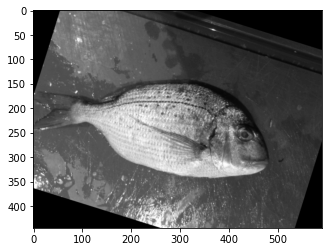

In [15]:
img_array = cv2.imread(train_df.paths[1] ,cv2.IMREAD_GRAYSCALE)  # convert to array
plt.imshow(img_array, cmap='gray')  # graph it
plt.show()  # display!

    

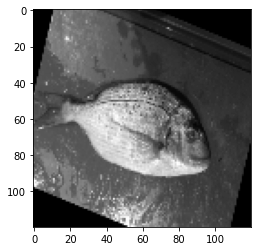

In [16]:
IMG_SIZE = 120

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [17]:
for path,label in zip(train_df.paths,train_df.labels):
    print(path,label)

data/fishdataset/Trout/00490.png 9
data/fishdataset/Red Sea Bream/00883.png 5
data/fishdataset/Gilt-Head Bream/00075.png 2
data/fishdataset/Sea Bass/00894.png 6
data/fishdataset/Striped Red Mullet/00478.png 8
data/fishdataset/Sea Bass/00074.png 6
data/fishdataset/Striped Red Mullet/00346.png 8
data/fishdataset/Hourse Mackerel/00929.png 3
data/fishdataset/Gilt-Head Bream/00947.png 2
data/fishdataset/Red Sea Bream/00731.png 5
data/fishdataset/Striped Red Mullet/00391.png 8
data/fishdataset/Trout/00727.png 9
data/fishdataset/Hourse Mackerel/00698.png 3
data/fishdataset/Hourse Mackerel/00013.png 3
data/fishdataset/Striped Red Mullet/00576.png 8
data/fishdataset/Hourse Mackerel/00522.png 3
data/fishdataset/Gilt-Head Bream/00341.png 2
data/fishdataset/Gilt-Head Bream/00885.png 2
data/fishdataset/Hourse Mackerel/00029.png 3
data/fishdataset/Black Sea Sprat/00261.png 1
data/fishdataset/Hourse Mackerel/00372.png 3
data/fishdataset/Red Mullet/00892.png 4
data/fishdataset/Sea Bass/00261.png 6
dat

data/fishdataset/Striped Red Mullet/00763.png 8
data/fishdataset/Striped Red Mullet/00494.png 8
data/fishdataset/Trout/00791.png 9
data/fishdataset/Red Mullet/00940.png 4
data/fishdataset/Black Sea Sprat/00934.png 1
data/fishdataset/Striped Red Mullet/00172.png 8
data/fishdataset/Shrimp/00541.png 7
data/fishdataset/Hourse Mackerel/00940.png 3
data/fishdataset/Striped Red Mullet/00689.png 8
data/fishdataset/Red Mullet/00140.png 4
data/fishdataset/Red Sea Bream/00587.png 5
data/fishdataset/Red Sea Bream/00812.png 5
data/fishdataset/Striped Red Mullet/00018.png 8
data/fishdataset/Striped Red Mullet/00587.png 8
data/fishdataset/Striped Red Mullet/00971.png 8
data/fishdataset/Gilt-Head Bream/00591.png 2
data/fishdataset/Striped Red Mullet/00334.png 8
data/fishdataset/Trout/00151.png 9
data/fishdataset/Red Sea Bream/00102.png 5
data/fishdataset/Sea Bass/00693.png 6
data/fishdataset/Gilt-Head Bream/00515.png 2
data/fishdataset/Red Mullet/00544.png 4
data/fishdataset/Gilt-Head Bream/00020.png 

In [18]:
training_data = []

def create_training_data():
    for path,label in tqdm(zip(train_df.paths,train_df.labels)):# do dogs and cats
        img_array = cv2.imread(path ,cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        training_data.append([new_array,label])
        

        '''path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))'''

create_training_data()


1440it [00:09, 159.56it/s]


In [19]:
for features,label in training_data:
    print(features,label)

[[ 14  14  95 ...   0   0   0]
 [  3  15  46 ...   0   0   0]
 [  0   9  18 ...   0   0   0]
 ...
 [  0   0   0 ... 146 143   0]
 [  0   0   0 ... 156 165  40]
 [  0   0   0 ... 141 145 140]] 9
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 5
[[  0  80  83 ...   0   0   0]
 [  0  83  92 ...   4   3   3]
 [  0  90  86 ...  70  70  65]
 ...
 [ 41  45  52 ... 101  99   0]
 [  1   2   2 ... 100  98   0]
 [  0   0   0 ... 102  96   0]] 2
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 6
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 8
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 6
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 8
[[

 [0 0 0 ... 0 0 0]] 2
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 6
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 9
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 5
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 5
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 2
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 4
[[ 0  0  0 ... 86 85  0]
 [ 1  1  1 ... 95 63  0]
 [19 20 19 ... 71 50  0]
 ...
 [ 0 73 74 ... 55 67 60]
 [ 0 74 77 ...  4  4  3]
 [ 0 75 73 ...  0  0  0]] 2
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 8
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 2
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 7
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 6
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 8
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 1
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 6
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 2
[[0 0 0 ... 0 0 0]
 [0 0

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 3
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 6
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 9
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 6
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 3
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 5
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 5
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 6
[[0 0 0 ... 0 0 0]
 [0 0

 [0 0 0 ... 0 0 0]] 8
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 9
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 7
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 8
[[ 0  0 57 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ... 40  0  0]] 3
[[  0   0   0 ...  62  59   0]
 [  0   1   1 ...  63  58   0]
 [ 32  31  35 ...  58  60   0]
 ...
 [  0  53  50 ... 119 123 121]
 [  0  42  40 ...   3   3   1]
 [  0  29  27 ...   0   0   0]] 4
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 7
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 9
[[0 0 0 ... 0 0 

In [20]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)


[[[[ 14]
   [ 14]
   [ 95]
   ...
   [  0]
   [  0]
   [  0]]

  [[  3]
   [ 15]
   [ 46]
   ...
   [  0]
   [  0]
   [  0]]

  [[  0]
   [  9]
   [ 18]
   ...
   [  0]
   [  0]
   [  0]]

  ...

  [[  0]
   [  0]
   [  0]
   ...
   [146]
   [143]
   [  0]]

  [[  0]
   [  0]
   [  0]
   ...
   [156]
   [165]
   [ 40]]

  [[  0]
   [  0]
   [  0]
   ...
   [141]
   [145]
   [140]]]]


In [21]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

### getting images

In [22]:
def define_model(nb_filters, kernel_size, input_shape, pool_size):
    model = Sequential()  # model is a linear stack of layers (don't change)

    # note: the convolutional layers and dense layers require an activation function
    # see https://keras.io/activations/
    # and https://en.wikipedia.org/wiki/Activation_function
    # options: 'linear', 'sigmoid', 'tanh', 'relu', 'softplus', 'softsign'

    model.add(Conv2D(nb_filters,
                     (kernel_size[0], kernel_size[1]),
                     padding='valid',
                     input_shape=input_shape))  # first conv. layer  KEEP
    model.add(Activation('relu'))  # Activation specification necessary for Conv2D and Dense layers

    model.add(Conv2D(nb_filters,
                     (kernel_size[0], kernel_size[1]),
                     padding='valid'))  # 2nd conv. layer KEEP
    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=pool_size))  # decreases size, helps prevent overfitting
    model.add(Dropout(0.5))  # zeros out some fraction of inputs, helps prevent overfitting

    model.add(Flatten())  # necessary to flatten before going into conventional dense layer  KEEP
    print('Model flattened out to ', model.output_shape)

    # now start a typical neural network
    model.add(Dense(32))  # (only) 32 neurons in this layer, really?   KEEP
    model.add(Activation('relu'))

    model.add(Dropout(0.5))  # zeros out some fraction of inputs, helps prevent overfitting

    model.add(Dense(nb_classes))  # 10 final nodes (one for each class)  KEEP
    model.add(Activation('softmax'))  # softmax,sigmoid, at end to pick between classes 0-9 KEEP

    # many optimizers available, see https://keras.io/optimizers/#usage-of-optimizers
    # suggest you KEEP loss at 'categorical_crossentropy' for this multiclass problem,
    # and KEEP metrics at 'accuracy'
    # suggest limiting optimizers to one of these: 'adam', 'adadelta', 'sgd'
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model


if __name__ == '__main__':
    # important inputs to the model: don't changes the ones marked KEEP
    batch_size = 5  # number of training samples used at a time to update the weights
    nb_classes = 10    # number of output possibilities: [0 - 9] KEEP
    nb_epoch = 4       # number of passes through the entire train dataset before weights "final"
    img_rows, img_cols = 28, 28   # the size of the MNIST images KEEP
    input_shape = (img_rows, img_cols, 1)   # 1 channel image input (grayscale) KEEP
    nb_filters = 32    # number of convolutional filters to use, max 32
    pool_size = (4, 4)  # pooling decreases image size, reduces computation, adds translational invariance
    kernel_size = (2, 2)  # convolutional kernel size, slides over image to learn features

    X_train, X_test, Y_train, Y_test = load_and_featurize_data()

    model = define_model(nb_filters, kernel_size, input_shape, pool_size)

    # during fit process watch train and test error simultaneously
    model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch,
              verbose=1, validation_data=(X_test, Y_test))

    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])  # this is the one we care about


NameError: name 'load_and_featurize_data' is not defined